# Tara Harwood's Data Story - Springboard Data Science Intensive - Oct 2016

## Pick a dataset - ideally the dataset for your Capstone.

### I am telling the story of the main dataset for my capstone project.  The dataset contains information about people who have signed at least one online petition with SumOfUs, aggregated by the first petition they signed. 

### In SumOfUs vocabulary, petition signers are "members" and the petitions are "campaigns". The campaigns in the dataset were all launched between Jan 2013 and Mar 2016.

* My dataset includes:
* Date of the campaign launch
* Count of all new members that joined from the campaign
* New members who found the campaign through Facebook (count and %)
* New members from each of the SumOfUs regions: USA, Canada, UK, Non-UK Europe, Australia, Rest of World (count and %)
* Engagement on the "welcome sequence", email series sent to new members in their 1st week (count and per member)
* Engagement in the members' first 14 days after joining (count and per member)
* Donations in the members' first 14 days after joining (count and per member)
* Engagement in the members' first 90 days after joining (count and per member)
* Donations in the members' first 90 days after joining (count and per member)

In [5]:
# import modules and set options
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
%matplotlib inline
pd.options.display.max_columns = None

# read aggregate data from file
ag_data = pd.read_csv('../capstone/theexportlistaggregatebycampaign.csv')
ag_data.head(5)

,page_id,name,page_created,page_type,count,fb,wel_opens,wel_clicks,wel_acts,opens_14day,clicks_14day,acts_14day,num_donations_14day,amt_donations_14day,num_recur_14day,amt_recur_14day,usa,can,uk,aus,nz,nuk_eur,row,en,de,fr,acts_90day,num_donations_90day,amt_donations_90day
0,12799,nhs-card-petition,2016-03-23 15:13:14,Petition,4317,4317,2174.0,460.0,713.0,6013.0,1108.0,1586.0,19.0,237.90,1.0,1.41,7,0,4301,0,1,7,1,4314,0,3,2410.0,74.0,657.16
1,12763,Nespresso-Muenchen-de,2016-03-21 12:28:20,Petition,1978,1495,1356.0,792.0,722.0,2444.0,1452.0,1491.0,NaN,NaN,NaN,NaN,6,0,3,2,0,1955,12,258,1714,6,2470.0,9.0,48.71
2,12705,schools-academies,2016-03-17 13:08:55,Petition,90,74,44.0,3.0,3.0,114.0,8.0,12.0,NaN,NaN,NaN,NaN,0,2,87,0,0,0,1,90,0,0,30.0,1.0,1.44
3,12689,NSW-police-crackdown,2016-03-16 19:38:22,Petition,2021,1989,1338.0,292.0,435.0,2467.0,434.0,562.0,17.0,237.92,NaN,NaN,10,3,17,1959,10,10,12,2020,0,1,955.0,45.0,510.45
4,12672,amazon-agm-usa,2016-03-16 14:20:40,Petition,180,32,87.0,19.0,16.0,152.0,25.0,156.0,NaN,NaN,NaN,NaN,173,0,2,0,0,2,3,180,0,0,202.0,NaN,NaN


In [6]:
# convert statistics into percentages and per member statistics, so we can compare across campaigns
divide_by_count_cols = ag_data.iloc[:,5:]
comp_data = pd.DataFrame(ag_data,columns=['page_id','page_created','page_type','count'])
comp_data = comp_data.join((round(divide_by_count_cols.divide(ag_data['count'], axis='index'),2)).fillna(0))
comp_data.head(5)

,page_id,page_created,page_type,count,fb,wel_opens,wel_clicks,wel_acts,opens_14day,clicks_14day,acts_14day,num_donations_14day,amt_donations_14day,num_recur_14day,amt_recur_14day,usa,can,uk,aus,nz,nuk_eur,row,en,de,fr,acts_90day,num_donations_90day,amt_donations_90day
0,12799,2016-03-23 15:13:14,Petition,4317,1.00,0.50,0.11,0.17,1.39,0.26,0.37,0.00,0.06,0.0,0.0,0.00,0.00,1.00,0.00,0.0,0.00,0.00,1.00,0.00,0.0,0.56,0.02,0.15
1,12763,2016-03-21 12:28:20,Petition,1978,0.76,0.69,0.40,0.37,1.24,0.73,0.75,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.99,0.01,0.13,0.87,0.0,1.25,0.00,0.02
2,12705,2016-03-17 13:08:55,Petition,90,0.82,0.49,0.03,0.03,1.27,0.09,0.13,0.00,0.00,0.0,0.0,0.00,0.02,0.97,0.00,0.0,0.00,0.01,1.00,0.00,0.0,0.33,0.01,0.02
3,12689,2016-03-16 19:38:22,Petition,2021,0.98,0.66,0.14,0.22,1.22,0.21,0.28,0.01,0.12,0.0,0.0,0.00,0.00,0.01,0.97,0.0,0.00,0.01,1.00,0.00,0.0,0.47,0.02,0.25
4,12672,2016-03-16 14:20:40,Petition,180,0.18,0.48,0.11,0.09,0.84,0.14,0.87,0.00,0.00,0.0,0.0,0.96,0.00,0.01,0.00,0.0,0.01,0.02,1.00,0.00,0.0,1.12,0.00,0.00


#### Can you count something interesting?

In [7]:
num_camps = ag_data['page_id'].count()
num_members = ag_data['count'].sum()
num_amt_donate_90 = ag_data['amt_donations_90day'].sum()
css="<style> span { font-family: 'Helvetica Neue', sans-serif; font-size: 15px; color:#365136} b {font-size: 20px; color:#129793} </style>"
sent1= "<span>To give you a general idea of the dataset, it contains  </span><b>"+str(num_camps)+"</b><span>  campaigns</span>"
sent2 = "<span> that inpired a total of  </span><b>"+"{:,}".format(num_members)+"</b><span>  new members to join SumOfUs.</span></br>"
sent3 = "<span> In the first 90 days after joining SumOfUs, these members donated </span><b>"+"${:0,.0f}".format(num_amt_donate_90)+".</b></span>"
text = css + sent1 + sent2 + sent3
HTML(text)

#### Can you find some trends (high, low, increase, decrease, anomalies)?

In [48]:
#make a new dataframe and calculate some new features
trend_data = pd.DataFrame(ag_data,columns=['page_id','page_created','count','amt_donations_90day'])
constant = pd.to_datetime('	2011-12-12 23:11:25')
trend_data['year'] = trend_data['page_created'].str[:4]
trend_data.head(3)

,page_id,page_created,count,amt_donations_90day,year
0,12799,2016-03-23 15:13:14,4317,657.16,2016
1,12763,2016-03-21 12:28:20,1978,48.71,2016
2,12705,2016-03-17 13:08:55,90,1.44,2016


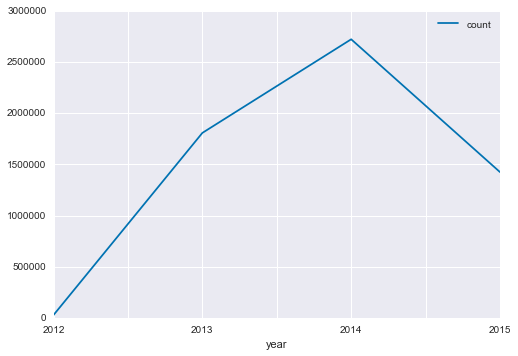

In [103]:
mpl.style.use(["seaborn-darkgrid", "seaborn-colorblind", "seaborn-notebook"])
count_group = pd.DataFrame(trend_data.groupby('year')['count'].sum())
count_group[1:5].plot()

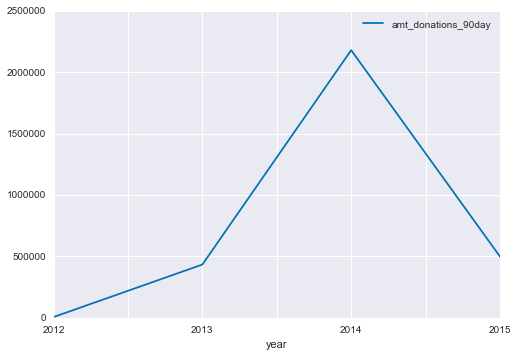

In [104]:
donate_group = pd.DataFrame(trend_data.groupby('year')['amt_donations_90day'].sum())
donate_group[1:5].plot()

In [ ]:
donate_group = pd.DataFrame(trend_data.groupby('year')['amt_donations_90day'].sum())
donate_group[1:5].plot()

#### Can you make a bar plot or a histogram?

#### Can you compare two related quantities?

#### Can you make a time-series plot?

#### Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

#### By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?